In [45]:
pip install wordcloud


In [46]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [81]:
#ADICIONANDO BIBLIOTECAS QUE SERAM USADAS DO SCRIPT
from pathlib import Path
import math
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from PIL import Image
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

import scikitplot as skplt
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import classification_report
from collections import Counter
import warnings
warnings.filterwarnings("ignore") #IGNORAR AVISOS

In [82]:
#ADICIONANDO OS CSV'S DE ICF, IDF E RF*IDF RESPECTIVAMENTE
DATAICF = pd.read_csv("ICF.csv",sep=";", decimal=',')
DATAIDF = pd.read_csv("idfRotulado.csv",sep=";", decimal=',')
DATARFIDF = pd.read_csv("RFIDF.csv",sep=";", decimal=',')


DATARFIDF['Classification'] = DATAIDF['Classification']

In [83]:
#ADICIONANDO O ARQUIVO COM AS PUBLICAÇÕES, IMAGEM E PALAVRAS PARA SEREM DESCARTADAS NA NUVEM DE PALAVRAS
text = open(r'documentosNoDuplicate.txt', mode='r', encoding='utf-8').read() #PUBLICAÇÕES COM AS PALAVRAS
mask = np.array(Image.open(r'IMG.jpg')) #IMAGEM QUE FORMARÁ A NUVEM DE PALAVRAS
nltk.download('stopwords') #BAIXANDO LISTA DE PALAVRAS
stop_words = nltk.corpus.stopwords.words('portuguese') #PALAVRAS QUE VÃO SER DESCARTADAS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
print(DATARFIDF['Classification'])

0       1
1       1
2       1
3       1
4       1
       ..
2238    2
2239    0
2240    1
2241    0
2242    0
Name: Classification, Length: 2243, dtype: int64


In [85]:
DATAIDF.head() #VISUALIZAÇÃO DO IDF

Unnamed: 0   10  abafar  abaixarem  abaixo  abaixou  abalar  abandona  \
0         216  0.0     0.0        0.0     0.0      0.0     0.0       0.0   
1         217  0.0     0.0        0.0     0.0      0.0     0.0       0.0   
2         277  0.0     0.0        0.0     0.0      0.0     0.0       0.0   
3         475  0.0     0.0        0.0     0.0      0.0     0.0       0.0   
4         555  0.0     0.0        0.0     0.0      0.0     0.0       0.0   

   abandonad  abandonada  ...  zero  zerou  zimmermann  zombava  zombou  \
0        0.0         0.0  ...   0.0    0.0         0.0      0.0     0.0   
1        0.0         0.0  ...   0.0    0.0         0.0      0.0     0.0   
2        0.0         0.0  ...   0.0    0.0         0.0      0.0     0.0   
3        0.0         0.0  ...   0.0    0.0         0.0      0.0     0.0   
4        0.0         0.0  ...   0.0    0.0         0.0      0.0     0.0   

   zucco  zueiro  zunara  zuo  Classification  
0    0.0     0.0     0.0  0.0               1  
1    0.0     0.0     0.0  0.0               1  
2    0.0     0.0     0.0  0.0               1  
3    0.0     0.0     0.0  0.0               1  
4    0.0     0.0     0.0  0.0               1  

[5 rows x 7702 columns]

In [86]:
DATARFIDF.head() #VISUALIZAÇÃO DO IDF

Unnamed: 0.1  Unnamed: 0   10  abafar  abaixarem  abaixo  abaixou  abalar  \
0            42       341.0  0.0     0.0        0.0     0.0      0.0     0.0   
1            43       861.0  0.0     0.0        0.0     0.0      0.0     0.0   
2          2236       143.0  0.0     0.0        0.0     0.0      0.0     0.0   
3          2238       745.0  0.0     0.0        0.0     0.0      0.0     0.0   
4             0       216.0  0.0     0.0        0.0     0.0      0.0     0.0   

   abandona  abandonad  ...  zero  zerou  zimmermann  zombava  zombou  zucco  \
0       0.0        0.0  ...   0.0    0.0         0.0      0.0     0.0    0.0   
1       0.0        0.0  ...   0.0    0.0         0.0      0.0     0.0    0.0   
2       0.0        0.0  ...   0.0    0.0         0.0      0.0     0.0    0.0   
3       0.0        0.0  ...   0.0    0.0         0.0      0.0     0.0    0.0   
4       0.0        0.0  ...   0.0    0.0         0.0      0.0     0.0    0.0   

   zueiro  zunara  zuo  Classification  
0     0.0     0.0  0.0               1  
1     0.0     0.0  0.0               1  
2     0.0     0.0  0.0               1  
3     0.0     0.0  0.0               1  
4     0.0     0.0  0.0               1  

[5 rows x 7703 columns]

# Balanceamento do Dataset ICF

In [87]:
X1 = DATAICF.drop(['Classification'], axis=1)
y1 = DATAICF['Classification']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=100)

over_sampler = RandomOverSampler(random_state=42)
X_res1, y_res1 = over_sampler.fit_resample(X_train, y_train)

print(f"Estatistica do Target de Treino: {Counter(y_res1)}")
print(f"Estatistica do Target de Teste: {Counter(y_test)}")

Estatistica do Target de Treino: Counter({1: 1561, 0: 1561, 2: 1561})
Estatistica do Target de Teste: Counter({1: 668, 0: 3, 2: 2})


# Multinomial Naive Bayes e RandomForestClassifier em ICF

              precision    recall  f1-score   support

           0       0.01      0.33      0.02         3
           1       1.00      0.87      0.93       668
           2       0.33      0.50      0.40         2

    accuracy                           0.86       673
   macro avg       0.45      0.57      0.45       673
weighted avg       0.99      0.86      0.92       673



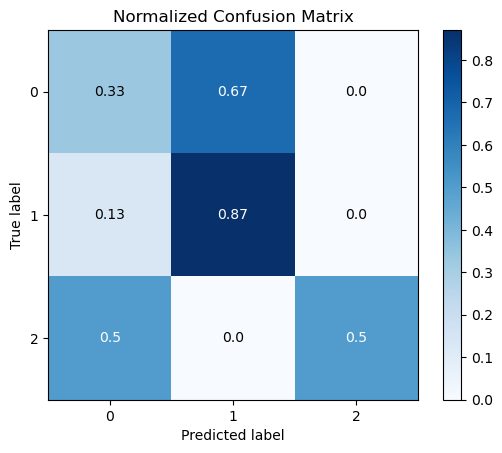

In [88]:
#APLICANDO MODELO DE MULTINOMIALNB
MNBclf = MultinomialNB()
MNBclf.fit(X_res1, y_res1)
ICF_PREDICAO_1 = MNBclf.predict(X_test)

#ESTIMATIVA DE APRENDIZADO DO MODELO E A MATRIZ CONFUSÃO
skplt.metrics.plot_confusion_matrix(y_test, ICF_PREDICAO_1, normalize=True)

print(classification_report(y_test, ICF_PREDICAO_1))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00       668
           2       1.00      1.00      1.00         2

    accuracy                           1.00       673
   macro avg       1.00      0.89      0.93       673
weighted avg       1.00      1.00      1.00       673



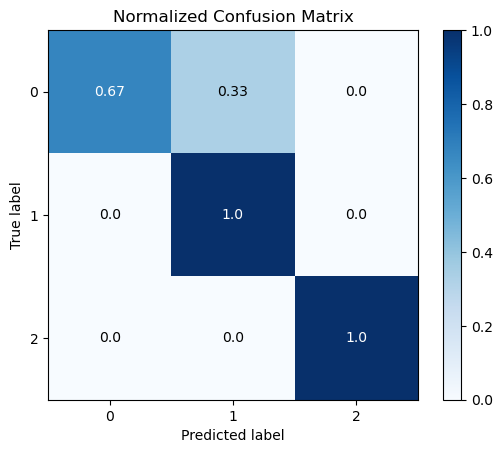

In [89]:
#APLICANDO MODELO DE RandomForestClassifier
RFclf = RandomForestClassifier()
RFclf.fit(X_res1, y_res1)
ICF_PREDICAO_2 = RFclf.predict(X_test)

#ESTIMATIVA DE APRENDIZADO DO MODELO E A MATRIZ CONFUSÃO
skplt.metrics.plot_confusion_matrix(y_test, ICF_PREDICAO_2, normalize=True)

print(classification_report(y_test, ICF_PREDICAO_2))

# Balanceamento do Dataset IDF

In [90]:
X2 = DATAIDF.drop(['Classification'], axis=1)
y2 = DATAIDF['Classification']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=100)

over_sampler = RandomOverSampler(random_state=42)
X_res2, y_res2 = over_sampler.fit_resample(X_train, y_train)

print(f"Estatistica do Target de Treino: {Counter(y_res2)}")
print(f"Estatistica do Target de Teste: {Counter(y_test)}")

Estatistica do Target de Treino: Counter({1: 1561, 0: 1561, 2: 1561})
Estatistica do Target de Teste: Counter({1: 668, 0: 3, 2: 2})


# Multinomial Naive Bayes e RandomForestClassifier em IDF

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00       668
           2       1.00      1.00      1.00         2

    accuracy                           1.00       673
   macro avg       1.00      0.89      0.93       673
weighted avg       1.00      1.00      1.00       673



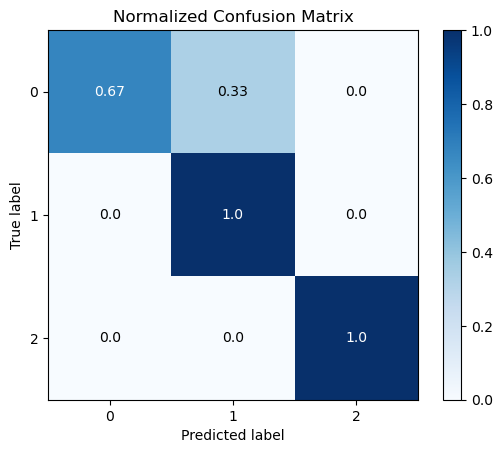

In [91]:
#APLICANDO MODELO DE MULTINOMIALNB
MNBclf = MultinomialNB()
MNBclf.fit(X_res2, y_res2)
IDF_PREDICAO_1 = MNBclf.predict(X_test)

#ESTIMATIVA DE CURVA DE APRENDIZADO DO MODELO E A MATRIZ CONFUSÃO
skplt.metrics.plot_confusion_matrix(y_test, IDF_PREDICAO_1, normalize=True)

print(classification_report(y_test, IDF_PREDICAO_1))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00       668
           2       1.00      1.00      1.00         2

    accuracy                           1.00       673
   macro avg       1.00      0.89      0.93       673
weighted avg       1.00      1.00      1.00       673



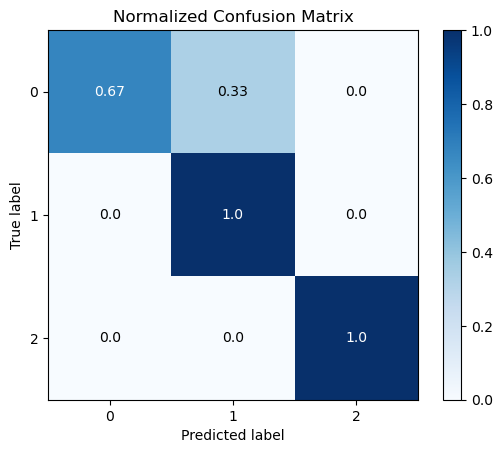

In [92]:
#APLICANDO MODELO DE MULTINOMIALNB
RFclf = RandomForestClassifier()
RFclf.fit(X_res2, y_res2)
IDF_PREDICAO_2 = RFclf.predict(X_test)

#ESTIMATIVA DE CURVA DE APRENDIZADO DO MODELO E A MATRIZ CONFUSÃO
skplt.metrics.plot_confusion_matrix(y_test, IDF_PREDICAO_2, normalize=True)

print(classification_report(y_test, IDF_PREDICAO_2))

# Balanceamento do Dataset RF*IDF

In [93]:
X3 = DATARFIDF.drop(['Classification'], axis=1)
y3 = DATARFIDF['Classification']

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=100)

over_sampler = RandomOverSampler(random_state=42)
X_res3, y_res3 = over_sampler.fit_resample(X_train, y_train)

print(f"Estatistica do Target de Treino: {Counter(y_res3)}")
print(f"Estatistica do Target de Teste: {Counter(y_test)}")

Estatistica do Target de Treino: Counter({1: 1561, 0: 1561, 2: 1561})
Estatistica do Target de Teste: Counter({1: 668, 0: 3, 2: 2})


# Multinomial Naive Bayes e RandomForestClassifier em RF*IDF

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.99      0.95      0.97       668
           2       0.03      0.50      0.06         2

    accuracy                           0.95       673
   macro avg       0.34      0.48      0.34       673
weighted avg       0.99      0.95      0.96       673



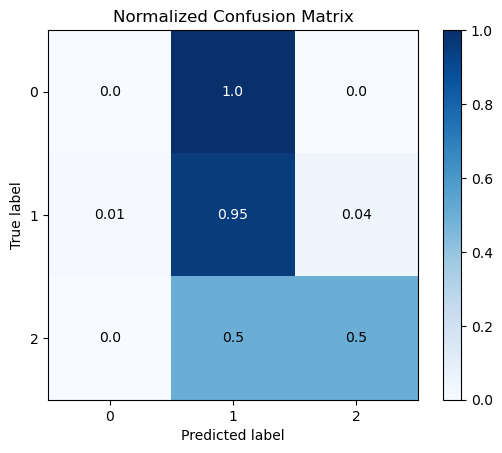

In [94]:
#APLICANDO MODELO DE MULTINOMIALNB
MNBclf = MultinomialNB()
MNBclf.fit(X_res3, y_res3)
RFIDF_PREDICAO_1 = MNBclf.predict(X_test)

#ESTIMATIVA DE CURVA DE APRENDIZADO DO MODELO E A MATRIZ CONFUSÃO
skplt.metrics.plot_confusion_matrix(y_test, RFIDF_PREDICAO_1, normalize=True)

print(classification_report(y_test, RFIDF_PREDICAO_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.99      1.00      1.00       668
           2       1.00      0.50      0.67         2

    accuracy                           0.99       673
   macro avg       0.66      0.50      0.55       673
weighted avg       0.99      0.99      0.99       673



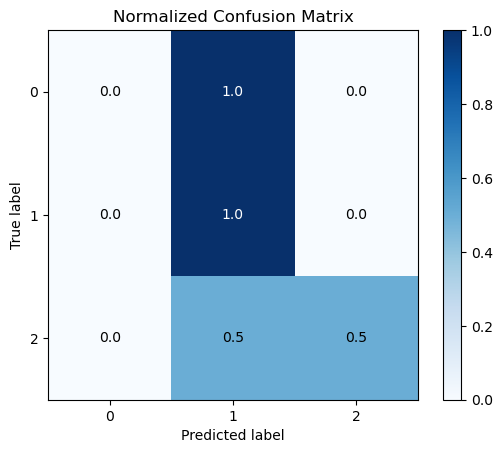

In [95]:
#APLICANDO MODELO DE MULTINOMIALNB
RFclf = RandomForestClassifier()
RFclf.fit(X_res3, y_res3)
RFIDF_PREDICAO_2 = RFclf.predict(X_test)

#ESTIMATIVA DE CURVA DE APRENDIZADO DO MODELO E A MATRIZ CONFUSÃO
skplt.metrics.plot_confusion_matrix(y_test, RFIDF_PREDICAO_2, normalize=True)

print(classification_report(y_test, RFIDF_PREDICAO_2))

# Nuvem de Palavras

(-0.5, 883.5, 719.5, -0.5)

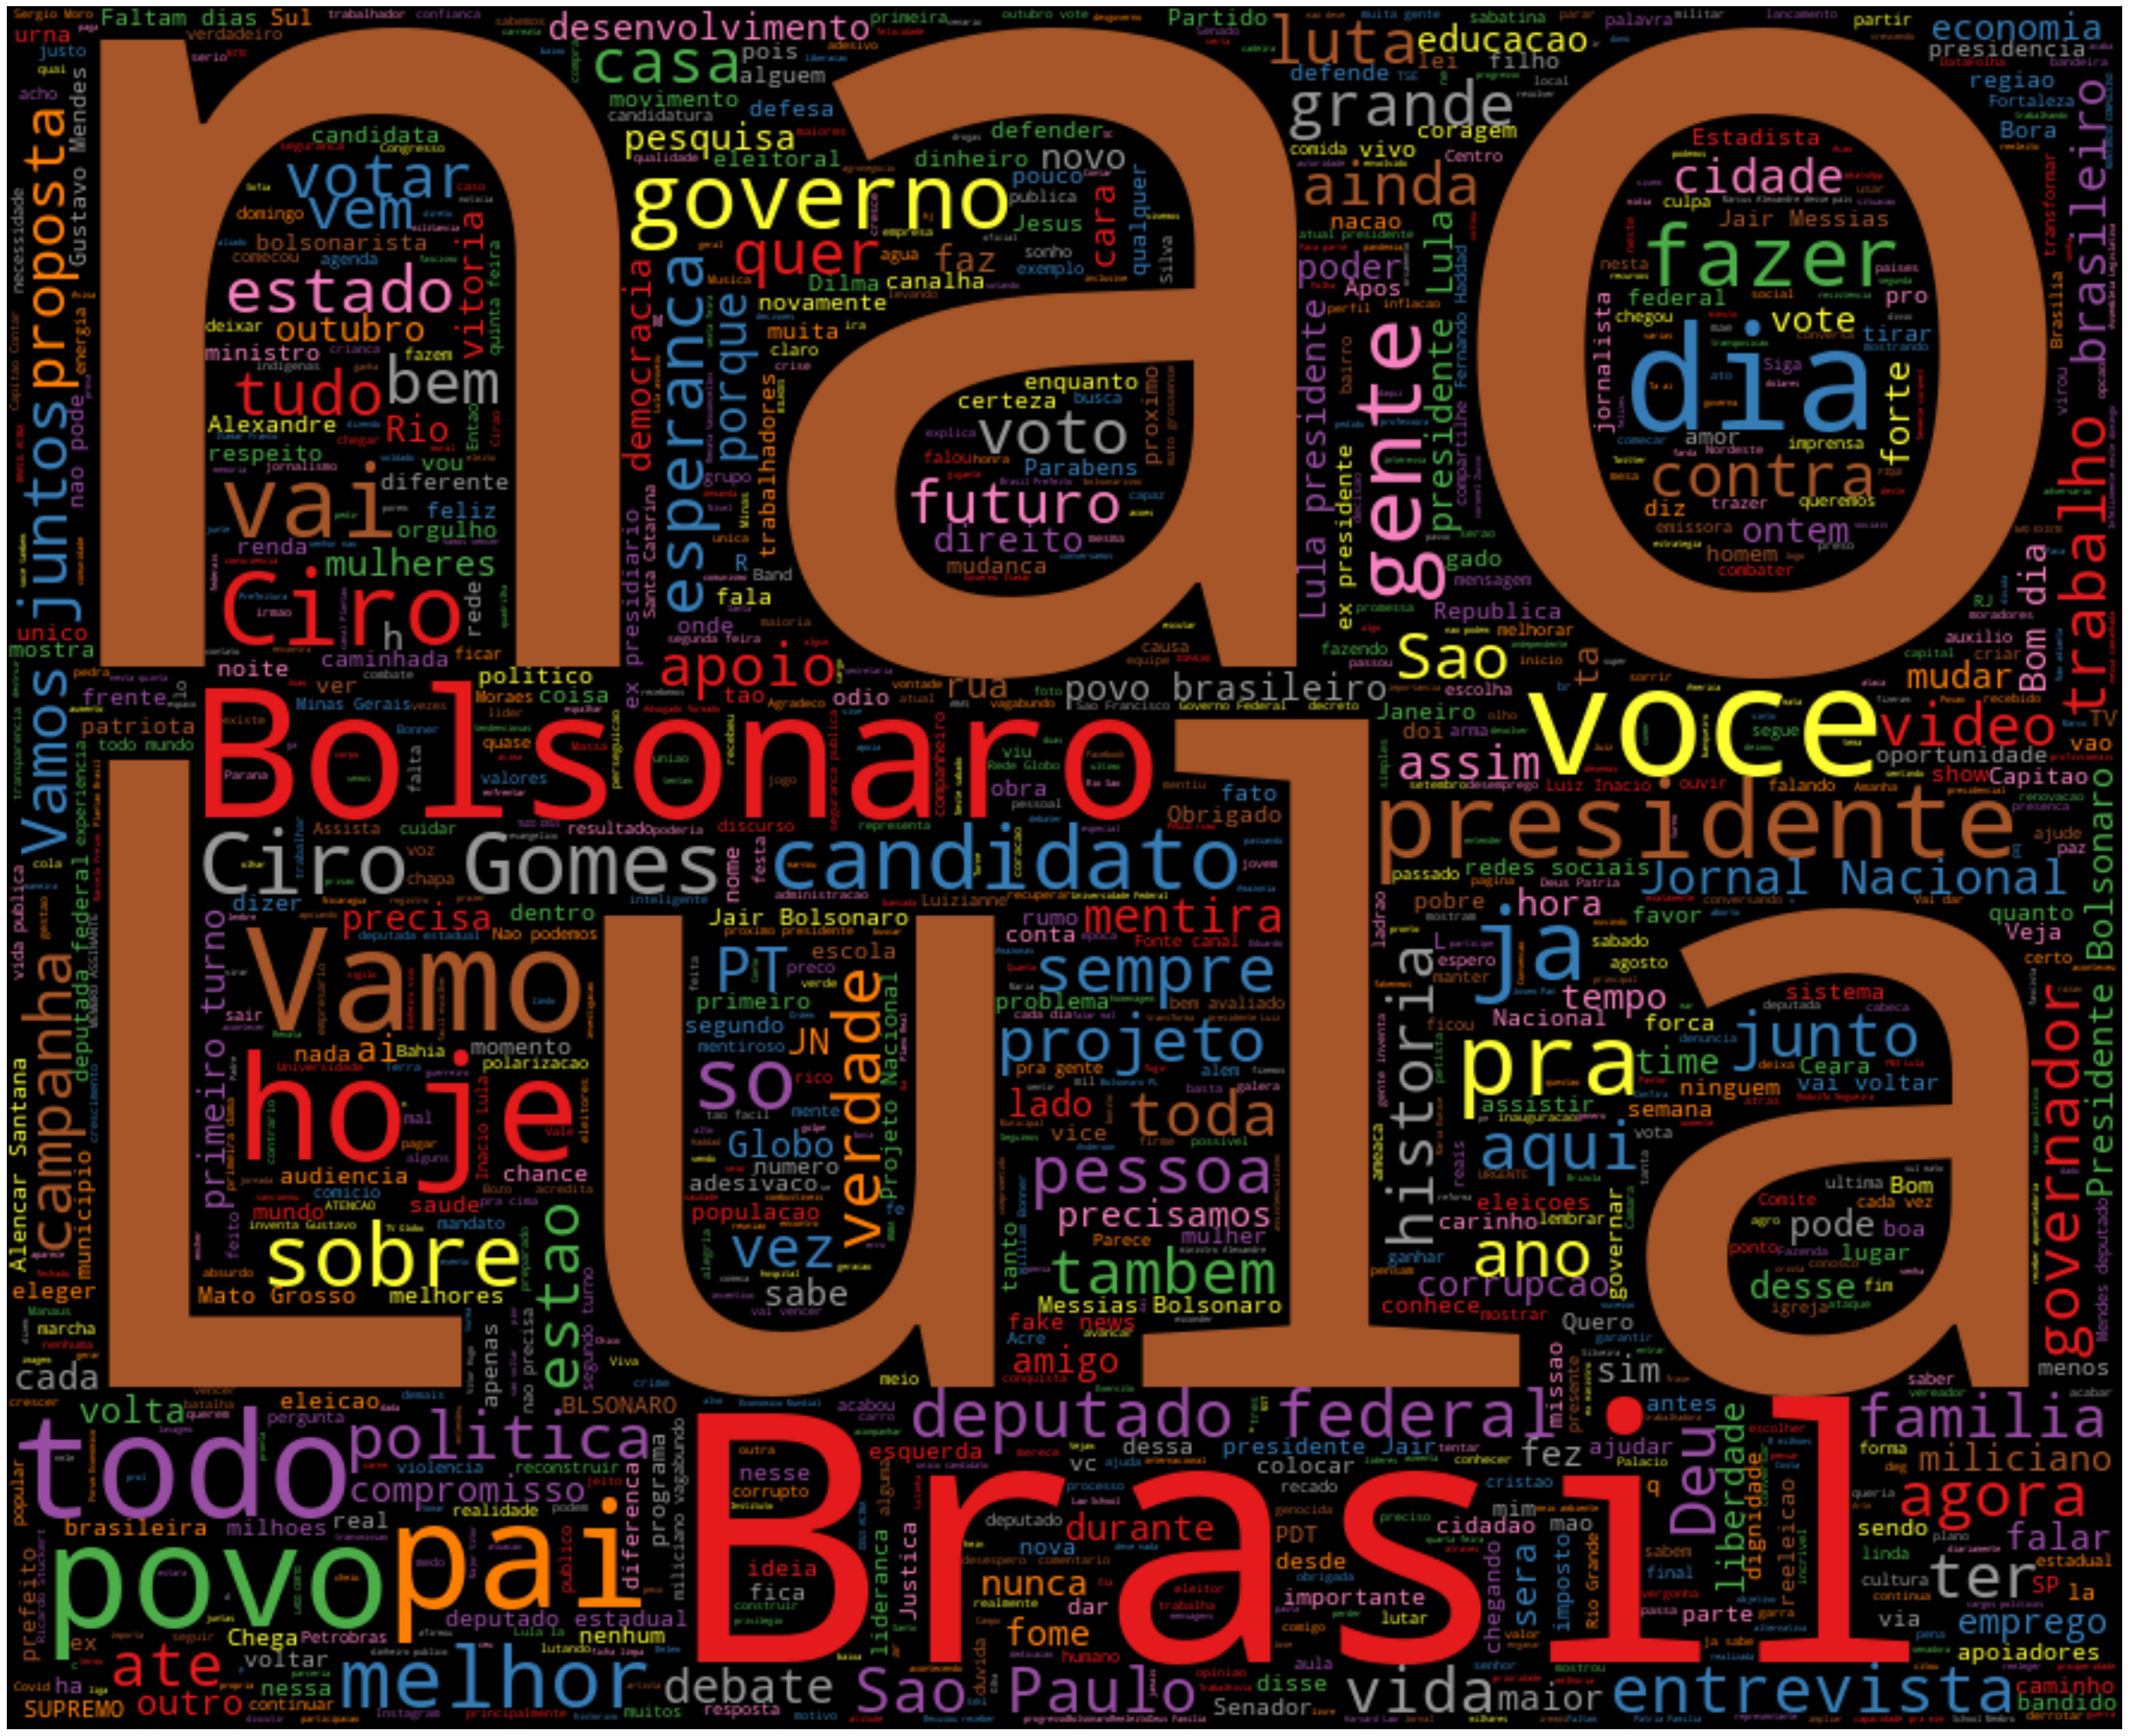

In [96]:
#PARAMETRIZANDO AS CONFIGURAÇÕES DA NUVEM DE PALAVRAS, TAMANHO, PALAVRAS DESCARTAVEIS, COLORAÇÃO E IMAGEM DE FORMATO
wc = WordCloud(stopwords = stop_words, mask = mask, colormap='Set1', background_color = "black", max_words = 3000, max_font_size =1000,random_state = 42, width=mask.shape[1], height=mask.shape[0])

wc.generate(text) #GERAÇÃO DA NUVEM DE PALAVRAS
plt.figure(figsize=(40,35)) #APLICANDO DESIGN
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [97]:
DATARFIDF = pd.read_csv("RFIDF.csv",sep=";", decimal=',')
DATARFIDF['Classification'] = DATAIDF['Classification']

# 3 Registros que contenham a palavra na núvem de palavras


# Positivo

In [98]:
#Separanto 3 valores
newdf = DATARFIDF[( DATARFIDF['Classification'] == 1)].head(3)
newdf
#guardando coluna de classificacao
newdfTarget =  DATARFIDF['Classification']
#removendo coluna
newdf = newdf.drop(['Classification'], axis=1)
#Prevendo valores
newdf["Predict"] = RFclf.predict(newdf)
#Adicionando classificação ao dataframe
newdf['Classification'] = newdfTarget

newdf[["Predict",'Classification']]

Predict  Classification
0        1               1
1        1               1
2        1               1

# Negativo

In [99]:
#Separanto 3 valores
newdf = DATARFIDF[( DATARFIDF['Classification'] == 2)].head(3)
newdf
#guardando coluna de classificacao
newdfTarget =  DATARFIDF['Classification']
#removendo coluna
newdf = newdf.drop(['Classification'], axis=1)
#Prevendo valores
newdf["Predict"] = RFclf.predict(newdf)
#Adicionando classificação ao dataframe
newdf['Classification'] = newdfTarget

newdf[["Predict",'Classification']]





Predict  Classification
42          1               2
43          2               2
2236        2               2

# Neutro

In [100]:
#Separanto 3 valores
newdf = DATARFIDF[( DATARFIDF['Classification'] == 0)].head(3)
newdf
#guardando coluna de classificacao
newdfTarget =  DATARFIDF['Classification']
#removendo coluna
newdf = newdf.drop(['Classification'], axis=1)
#Prevendo valores
newdf["Predict"] = RFclf.predict(newdf)
#Adicionando classificação ao dataframe
newdf['Classification'] = newdfTarget

newdf[["Predict",'Classification']]


Predict  Classification
44          1               0
45          0               0
1662        0               0

# Conclusão

Com o objetivo de melhorar a classificação e quais palavras tinham maiores pesos nas postagens, utilizamos fatores de ponderação, sendo ICF (Inverse-Category-Frequency), RF (Relevance Frequency) e RF*IDF (Inverse Document Frequency).
No projeto em questão, utilizamos dois modelos de dados bem famosos no ramo da classificação de textos o Naive Bayes e Random Forest Classifier.




ICF:
Utilizando o modelo Naive Bayes usando o arquivo contendo a ponderação ICF aplicada, obtivemos 86% de acurácia, sendo que o modelo só performou bem prevendo dados classificados como postagens positivas com um f1-score de 93%. Utilizando o random forest, obtivemos um sinal claro de overfiting, talvez por conta de os dados não terem sido tratados corretamente ou por conta dá má classificação dos dados feita na C2, nesse modelo só obtivemos resultados abaixo dos 100% para postagens neutras com o modelo obtendo 67% para recall e 80% para f1-score.

IDF:
Com a base de dados em questão obtivemos resultados semelhantes à ICF, usando o modelo Random Forest e Naive Bayes. Para os dois modelos continuamos com sinais de overfitting nas métricas de avaliação, só variando em postagens neutras.

RF*IDF: O modelo de dados Naive Bayes utilizando essa diretiva nos dados não performou bem com postagens neutras e negativas, para postagens classificadas como positivas o modelo teve uma precisão de 99% e 95% de Recall. Utilizando Random Frores Classifier, obtivemos bons resultados com postagens classificadas como positivas e negativas, sendo a precisão 99% para postagens positivas e 100% para negativas. Apesar da boa precisão para postagens positivas e negativas, a métrica f1-score das postagens classificadas como negativas ficou em 67% sendo esse a média harmônica entre Precisão e Recall.


Utilizando a biblioteca WordCloud para gerar a nuvem de palavras que mais apareceram em nossos dados, as seguintes palavras mais se destacaram: Não, Lula, Bolsonaro, Ciro Gomes e Brasil. O resultado foi conforme o esperado, a nuvem destacou as principais palavras relacionadas à eleição presidencial brasileira, neste contexto podemos dizer que o motivo do “não” ter ficado em alta é pela questão dessas eleições serem decididas por quem tem a maior desaprovação e não porque de fato gostam mais de um candidato do que do outro. Depois disso a palavra “Lula” também apareceu bastante possivelmente pelo motivo de ser adversário de Bolsonaro que estava por 4 anos no poder e que estava com grande desaprovação, no meio disso a palavra “Lula” ganhou destaque.

Utilizando o Random Forest Classifier, a previsão de 3 registros em postagens classificadas como Positiva, Negativa e Neutra respectivamente, refletiu bem o que as métricas de avaliação retornaram. O modelo conseguiu acertar 2/3 em postagens consideradas neutras e 100% positivas e negativa.